In [249]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from cmath import pi
from cmath import exp
import math
from scipy import stats

In [250]:
def func(file):
    global set1
    set1 = list()
    with open (file) as set_1:
        reader1 = list(csv.reader(set_1))
        set1 = reader1[0]
    for i in range(len(set1)):
        set1[i] = int(set1[i])
    np.random.shuffle(set1)
    set1 = set1[0:1000]
    set1.sort()

    global set1_dict
    set1_dict = dict()
    for i in set1:
        if i in set1_dict.keys():
            set1_dict[i] += 1
        else:
            set1_dict[i] = 1
    print(set1_dict)
    return

In [251]:
def func_for_float(file):
    global set1
    set1 = list()
    with open (file) as set_1:
        reader1 = list(csv.reader(set_1))
        set1 = reader1[0]

    for i in range(len(set1)):
        set1[i] = float(set1[i])

    np.random.shuffle(set1)
    set1 = set1[0:1000]

    set1.sort()
    global set1_dict
    set1_dict = dict()
    for i in set1:
        if i in set1_dict.keys():
            set1_dict[i] += 1
        else:
            set1_dict[i] = 1

In [252]:
def func_1():
    global sum_m
    global m
    global p1_dict
    sum_m= 0
    p1_dict = {}
    for k, v in set1_dict.items():
        p1_dict[k] = v/len(set1)
        sum_m += k*v
    m = sum_m/len(set1)

    global sum_D
    global d
    global q
    sum_D = 0
    for k, v in set1_dict.items():
        sum_D += (k - m)**2*v

    d = sum_D/len(set1)
    q = d**(1/2)
    return

In [253]:
def colmogorov_check(x, p, fun):
        P = {
            0.0: 1.0,
            0.1: 1.0,
            0.2: 1.0,
            0.3: 1.0,
            0.4: 0.997,
            0.5: 0.964,
            0.6: 0.864,
            0.7: 0.711,
            0.8: 0.544,
            0.9: 0.393,
            1.0: 0.270,
            1.1: 0.178,
            1.2: 0.112,
            1.3: 0.068,
            1.4: 0.040,
            1.5: 0.022,
            1.6: 0.012,
            1.7: 0.006,
            1.8: 0.003,
            1.9: 0.002,
            2.0: 0.001,
        }

        n = len(set1)
        x = list(set1_dict.keys())
        D = max([np.abs(Emper_f(set1_dict, x[i], n)-fun(x[i])) for i in range(len(x))])

        l = D * (len(x))**(1/2)
        l = round(l,1)


        print('D is ', D)
        print('l is ', l)
        if l > 2:
            return 0
        return P[l]

In [254]:
def Emper_f(r_dict,k,n):
    my_sum = 0
    k_list = list(r_dict.keys())
    for i in k_list:
        if (i <= k):
            my_sum += r_dict[i]
        else:
            break
    return my_sum/n

In [255]:
normal_distr = lambda x: 0.5 + 0.5 * math.erf((x-m)/q)

In [256]:
def normal(z):
    f_normal_distr = lambda x: 1 / ((2 * pi)**(1/2) * q) * exp((-1/2) * ((x - m) / q) ** 2)

    y = []
    for i in z:
        y.append(f_normal_distr(i))

    plt.plot(z, y)
    plt.show()

    print(m)
    print(d)
    print(q)

In [257]:
geometric_p = 1/m
geometric_distr = lambda x: 1 - (1-geometric_p)**x

In [258]:
def geom():
    f_geometric_distr = lambda x: geometric_p*(1 - geometric_p)**(x - 1)
    geometric_p = 1/m
    print(1/m)
    x = set1_dict.keys()
    y = []
    for i in x:
        y.append(f_geometric_distr(i))

    plt.plot(x, y)
    plt.show()

In [259]:
def exp_distr(x):
    if x <= 0:
        return 0
    else:
        return 1 - exp(-(1/m)*x)

In [260]:
def exp_f():
    f_exp_distr = lambda x: (1/m)*exp(-(1/m)*x)

    x = []
    for i in set1_dict.keys():
        if i > 0:
            x.append(i)
    y = []
    for i in x:
        y.append(f_exp_distr(i))

    plt.plot(x, y)
    plt.show()

In [261]:
def interval_checking(m, D, n, betta):
    t = {
            0.80: 1.282,
            0.81: 1.310,
            0.82: 1.340,
            0.83: 1.371,
            0.84: 1.404,
            0.85: 1.439,
            0.86: 1.475,
            0.87: 1.513,
            0.88: 1.554,
            0.89: 1.597,
            0.90: 1.643,
            0.91: 1.694,
            0.92: 1.750,
            0.93: 1.810,
            0.94: 1.880,
            0.95: 1.960,
            0.96: 2.053,
            0.97: 2.169,
            0.98: 2.325,
            0.99: 2.576,
            0.9973: 3.000,
            0.999: 3.290,
        }

    sigma = (D/n)**(1/2)
    eps = sigma*t[betta]

    print('m interval is ','[', m-eps,';',m+eps,']')
    sigma_d = ((0.8*n+1.2)/(n*(n-1)))**(1/2)*D
    print('d interval is ','[', D-t[betta]*sigma_d,';',D+t[betta]*sigma_d,']')


set1

In [262]:
func("set_1.csv.txt.xls")

{1: 320, 2: 204, 3: 146, 4: 95, 5: 73, 6: 55, 7: 29, 8: 24, 9: 10, 10: 13, 11: 8, 12: 5, 13: 4, 14: 4, 15: 2, 16: 2, 17: 1, 18: 2, 19: 1, 28: 1, 31: 1}


In [263]:
func_1()

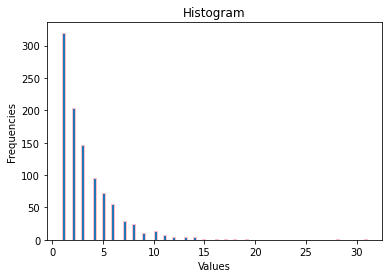

In [264]:
data = set1
plt.hist(data,edgecolor="pink", bins =100)
plt.title("Histogram")
plt.xlabel("Values")
plt.ylabel("Frequencies")
plt.show()

Normal

In [265]:
normal_distr = lambda x: 0.5 + 0.5 * math.erf((x-m)/q)

C:\Users\stas2\PycharmProjects\pythonProject\venv\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


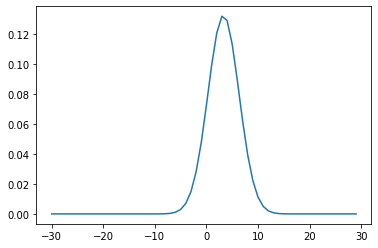

3.305
9.071975
3.0119719454204747


In [266]:
x = range(-30,30,1)
normal(x)

Geometric

In [267]:
##geometric_distr = lambda x: 1 - (1-geometric_p)**x

0.302571860816944


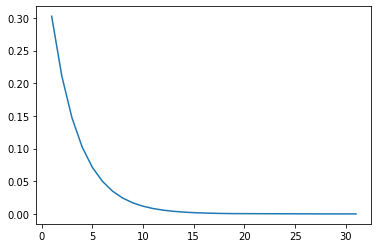

In [268]:
geom()

Exponenta

In [269]:
def exp_distr(x):
    if x <= 0:
        return 0
    else:
        return 1 - exp(-(1/m)*x)

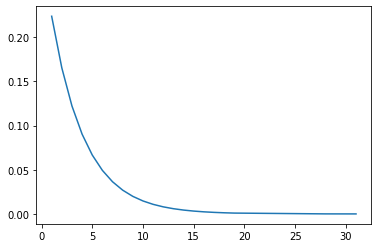

In [270]:
exp_f()

In [271]:
print(colmogorov_check(list(set1_dict.keys()),list(p1_dict.values()),geometric_distr))

D is  2.2378280278534405e+27
l is  1.0255016329932137e+28
0


In [272]:
print(colmogorov_check(list(set1_dict.keys()),list(p1_dict.values()),normal_distr))

D is  0.2539750978276726
l is  1.2
0.112


In [273]:
print(colmogorov_check(list(set1_dict.keys()),list(p1_dict.values()),exp_distr))

D is  0.0734448085343341
l is  0.3
1.0


In [274]:
interval_checking(m,d,1000,0.98)

m interval is  [ 3.0835509203916733 ; 3.526449079608327 ]
d interval is  [ 8.474647474220815 ; 9.669302525779186 ]


Set2

In [275]:
func_for_float("set_2.csv.txt.xls")

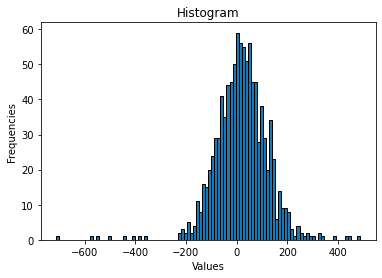

In [276]:
data = set1
plt.hist(data,edgecolor="black", bins =100)
plt.title("Histogram")
plt.xlabel("Values")
plt.ylabel("Frequencies")
plt.show()

In [277]:
func_1()

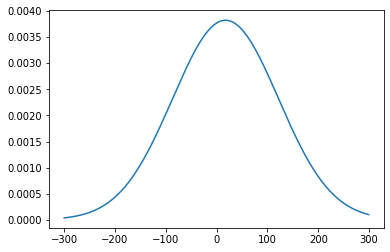

17.589777453000067
10899.40335657079
104.40020764620533


In [278]:
x = range(-300,300,1)
normal(x)

0.056851202505091535


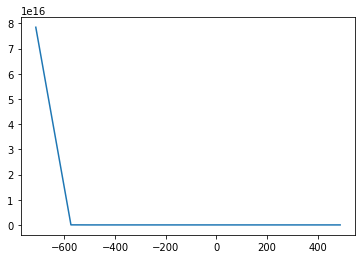

In [279]:
geom()

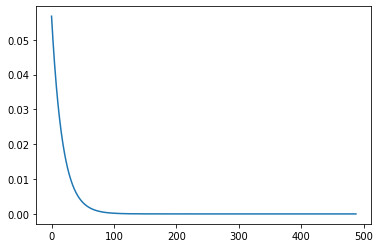

In [280]:
exp_f()

In [281]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),normal_distr))

D is  0.05819278913953252
l is  1.8
0.003


In [282]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),geometric_distr))

OverflowError: complex exponentiation

In [ ]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),exp_distr))

In [ ]:
interval_checking(m,d,1000,0.98)

Set3

In [ ]:
func_for_float("set_3.csv.txt.xls")

In [ ]:
data = set1
plt.hist(data,edgecolor="black", bins =100)
plt.title("Histogram")
plt.xlabel("Values")
plt.ylabel("Frequencies")
plt.show()

In [ ]:
func_1()

In [ ]:
x = [0.05,0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.7, 0.8, 0.85]
normal(x)

In [ ]:
geom()

In [ ]:
exp_f()

In [ ]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),normal_distr))

In [ ]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),geometric_distr))

In [ ]:
print(colmogorov_check(set1_dict,list(p1_dict.values()),exp_distr))

In [ ]:
interval_checking(m,d,1000,0.98)